In [172]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [ ]:
'''Extract dataset from world bank data'''
import wbdata
import pandas as pd
import datetime

# Function to download data from World Bank API
def download_world_bank_data(indicators, country_codes, start_year, end_year, output_file):
    """
    Downloads tabular and time-series data from the World Bank API.

    Parameters:
        indicators (dict): A dictionary of indicators {"indicator_code": "indicator_name"}.
        country_codes (list): List of country codes to include in the data.
        start_year (int): Start year for the data.
        end_year (int): End year for the data.
        output_file (str): Path to save the downloaded data as a CSV file.

    Returns:
        None
    """
    # Set the date range
    data_date_range = (datetime.datetime(start_year, 1, 1), datetime.datetime(end_year, 12, 31))

    # Fetch data
    print("Fetching data from the World Bank API...")
    data = wbdata.get_dataframe(indicators, country=country_codes, date=data_date_range, parse_dates=True)

    # Reset index and save to CSV
    data.reset_index(inplace=True)
    data.to_csv(output_file, index=False)
    print(f"Data saved to {output_file}")

# Define indicators of interest (you can look up indicators in the metadat file)
# Each idicator has an ID, and you can assign to it a label that will be used as column name in the dataFrame

indicators = {
    "NY.GDP.PCAP.PP.KD": "GDPpc_2017$", #"GDP per capita, PPP (constant 2017 US$)
    "SP.POP.TOTL": "Population_total",
    "SP.DYN.LE00.IN": "Life_expectancy"
    ,"SE.ADT.LITR.ZS": "Literacy_rate"
    ,"SL.UEM.TOTL.ZS": "Unemployment_rate"
    ,"EG.USE.PCAP.KG.OE": "Access_electricity"
    ,"SP.DYN.TFRT.IN": "Fertility_rate"
    ,"SI.POV.NAHC": "Poverty_ratio"
    ,"SE.PRM.ENRR": "Primary_school_enrolment_rate"
    #,"NE.GDI.TOTL.ZS": "Gross_capital_formation"
    #,"IT.NET.USER.ZS": "Internet_users"
    #,"SE.XPD.TOTL.GD.ZS": "Gov_education_investment"
    #,"EN.ATM.CO2E.PC": "CO2_emissions"
    #,"SI.POV.GINI": "Income_inequality"
    #,"SH.H2O.BASW.ZS": "Access_to_water"
    ,"EG.USE.PCAP.KG.OE": "Energy_use"
    #,"NE.EXP.GNFS.CD": "Exports_c$", #Exports of goods and services (current US$)
    ,"NE.EXP.GNFS.KD": "Exports_2017$" #Exports of goods and services (current US$)
    # ,"SE.XPD.PRIM.PC.ZS":  "Expenditure_primary" #Government expenditure per student, primary (% of GDP per capita)
    # ,"SE.XPD.SECO.PC.ZS":  "Expenditure_secodary" #Government expenditure per student, secondary (% of GDP per capita)
    # ,"SE.XPD.TERT.PC.ZS":  "Expenditure_tertiary" #"Government expenditure per student, tertiary (% of GDP per capita)"
    }


expression='^(?!(?:World|Upper middle income|Sub\-Saharan Africa excluding South Africa|Sub\-Saharan Africa|Latin America \& Caribbean|IDA countries in Sub\-Saharan Africa classified as fragile situations|IDA\scountries\sin\sSub\-Saharan\sAfrica\snot\sclassified\sas\sfragile\ssituations|Sub\-Saharan Africa excluding South Africa and Nigeria|South Asia \(IDA \& IBRD\)|Sub-Saharan Africa \(IDA \& IBRD countries\)|Middle East \& North Africa \(IDA \& IBRD countries\)|Latin America \& the Caribbean \(IDA \& IBRD countries\)|Europe \& Central Asia \(IDA \& IBRD countries\)|East Asia \& Pacific \(IDA \& IBRD countries\)|Sub\-Saharan Africa|Sub\-Saharan Africa \(excluding high income\)|Resource rich Sub\-Saharan Africa countries|IDA countries not classified as fragile situations\, excluding Sub-Saharan Africa|Non\-resource rich Sub\-Saharan Africa countries|Middle East \& North Africa \(excluding high income\)|Middle East \(developing only\)|Latin America \& Caribbean \(excluding high income\)|IBRD\, including blend|Heavily indebted poor countries \(HIPC\)|IDA countries classified as fragile situations\, excluding Sub\-Saharan Africa|Europe \& Central Asia \(excluding high income\)|East Asia \& Pacific \(excluding high income\)|Sub\-Saharan Africa \(IDA\-eligible countries\)|IDA countries in Sub\-Saharan Africa classified as fragile situations|South Asia \(IDA\-eligible countries\)|IDA countries in Sub\-Saharan Africa not classified as fragile situations|Middle East \& North Africa \(IDA\-eligible countries\)|Latin America \& the Caribbean \(IDA\-eligible countries\)|Europe \& Central Asia \(IDA\-eligible countries\)|East Asia \& Pacific \(IDA\-eligible countries\)|South Asia \(IFC classification\)|Middle East and North Africa \(IFC classification\)|Latin America and the Caribbean \(IFC classification\)|Europe and Central Asia \(IFC classification\)|East Asia and the Pacific \(IFC classification\)|Sub\-Saharan Africa \(IFC classification\)|Sub\-Saharan Africa \(IBRD\-only countries\)|Latin America \& the Caribbean \(IBRD\-only countries\)|Middle East \& North Africa \(IBRD\-only countries\)|East Asia \& Pacific \(IBRD\-only countries\)|IBRD countries classified as high income|Europe \& Central Asia \(IBRD\-only countries\)|Sub\-Saharan Africa \(IDA \& IBRD countries\)|Sub-Saharan Africa \(excluding high income\)|Sub\-Saharan Africa|South Asia \(IDA \& IBRD\)|South Asia|Small states|Pre\-demographic dividend|Post\-demographic dividend|Pacific island small states|Other small states|OECD members|Not classified|North America|Middle income|Middle East \& North Africa \(IDA \& IBRD countries\)|Middle East \& North Africa \(excluding high income\)|Middle East \& North Africa|Lower middle income|Low income|Low \& middle income|Least developed countries\: UN classification|Latin America \& the Caribbean \(IDA \& IBRD countries\)|Latin America \& Caribbean \(excluding high income\)|Latin America \& Caribbean|Late\-demographic dividend|IDA total|IDA only|IDA blend|IDA \& IBRD total|IBRD only|High income|Heavily indebted poor countries \(HIPC\)|Fragile and conflict affected situations|European Union|Europe \& Central Asia \(IDA \& IBRD countries\)|Europe \& Central Asia \(excluding high income\)|Europe \& Central Asia|Euro area|East Asia \& Pacific \(IDA \& IBRD countries\)|East Asia \& Pacific \(excluding high income\)|East Asia \& Pacific|Early\-demographic dividend|Central Europe and the Baltics|Caribbean small states|Arab World|Africa Western and Central|Africa Eastern and Southern)$).*$'
data = wbdata.get_countries(query=expression)
country_codes=[]
for item in data:
    if item["id"]!='DNS' and item["id"]!='DSF':
        country_codes.append(item["id"])

#country_codes = ["USA", "CHN", "IND", "BRA", "RUS"]  # Example countries
start_year = 1980
end_year = 2023
output_file = "data/world_bank_data_dev.csv"

# Download and save data
download_world_bank_data(indicators, country_codes, start_year, end_year, output_file)


Fetching data from the World Bank API...


<>:61: SyntaxWarning: invalid escape sequence '\-'
<>:61: SyntaxWarning: invalid escape sequence '\-'
C:\Users\User\AppData\Local\Temp\ipykernel_15876\3310543333.py:61: SyntaxWarning: invalid escape sequence '\-'
  expression='^(?!(?:World|Upper middle income|Sub\-Saharan Africa excluding South Africa|Sub\-Saharan Africa|Latin America \& Caribbean|IDA countries in Sub\-Saharan Africa classified as fragile situations|IDA\scountries\sin\sSub\-Saharan\sAfrica\snot\sclassified\sas\sfragile\ssituations|Sub\-Saharan Africa excluding South Africa and Nigeria|South Asia \(IDA \& IBRD\)|Sub-Saharan Africa \(IDA \& IBRD countries\)|Middle East \& North Africa \(IDA \& IBRD countries\)|Latin America \& the Caribbean \(IDA \& IBRD countries\)|Europe \& Central Asia \(IDA \& IBRD countries\)|East Asia \& Pacific \(IDA \& IBRD countries\)|Sub\-Saharan Africa|Sub\-Saharan Africa \(excluding high income\)|Resource rich Sub\-Saharan Africa countries|IDA countries not classified as fragile situations\, 

Data saved to world_bank_data_dev.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.impute import KNNImputer
# from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data_path = r"data/world_bank_data_dev.csv"

# Load dataset
df = pd.read_csv(data_path)

# Display basic info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636 entries, 0 to 9635
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        9636 non-null   object 
 1   date                           9636 non-null   object 
 2   GDPpc_2017$                    6655 non-null   float64
 3   Population_total               9626 non-null   float64
 4   Life_expectancy                9086 non-null   float64
 5   Literacy_rate                  1124 non-null   float64
 6   Unemployment_rate              6233 non-null   float64
 7   Energy_use                     4854 non-null   float64
 8   Fertility_rate                 9085 non-null   float64
 9   Poverty_ratio                  1024 non-null   float64
 10  Primary_school_enrolment_rate  7120 non-null   float64
 11  Exports_2017$                  5901 non-null   float64
dtypes: float64(10), object(2)
m

In [76]:
print("Dataset Shape:", df.shape)

Dataset Shape: (9636, 12)


In [77]:
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 Rows:
  country      date  GDPpc_2017$  Population_total  Life_expectancy  \
0   Aruba  1/1/2023  40516.80856          107359.0              NaN   
1   Aruba  1/1/2022  38877.67444          107310.0           74.992   
2   Aruba  1/1/2021  35696.30937          107700.0           74.626   
3   Aruba  1/1/2020  28521.68885          108587.0           75.723   
4   Aruba  1/1/2019  38435.42691          109203.0           76.248   

   Literacy_rate  Unemployment_rate  Energy_use  Fertility_rate  \
0            NaN                NaN         NaN             NaN   
1            NaN                NaN         NaN           1.179   
2            NaN                NaN         NaN           1.180   
3      97.989998                NaN         NaN           1.325   
4            NaN                NaN         NaN           1.486   

   Poverty_ratio  Primary_school_enrolment_rate  Exports_2017$  
0            NaN                            NaN            NaN  
1            NaN         

In [78]:
df["date"] = pd.to_datetime(df["date"]).dt.year
df["date"]

0       2023
1       2022
2       2021
3       2020
4       2019
        ... 
9631    1984
9632    1983
9633    1982
9634    1981
9635    1980
Name: date, Length: 9636, dtype: int32

In [79]:
print("\nCountries:")
countries=sorted(df['country'].unique())
print(len(countries))
for i in countries:
    print(i)


Countries:
219
Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR, China
Hungary
Iceland
India
Indonesia
Iran, Islamic Rep.
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaic

In [80]:
print("Missing Values:")
df.isnull().sum().sort_values(ascending=False)

Missing Values:


Poverty_ratio                    8612
Literacy_rate                    8512
Energy_use                       4782
Exports_2017$                    3735
Unemployment_rate                3403
GDPpc_2017$                      2981
Primary_school_enrolment_rate    2516
Fertility_rate                    551
Life_expectancy                   550
Population_total                   10
country                             0
date                                0
dtype: int64

In [81]:
print("Date:")
date_unique=sorted(df['date'].unique())
print(len(date_unique))
print(date_unique[0],date_unique[-1])

Date:
44
1980 2023


C:\Users\tanbe\AppData\Local\Temp\ipykernel_35416\3904211530.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = df.drop(columns=['date']).groupby('country').apply(lambda x: x.isnull().sum())


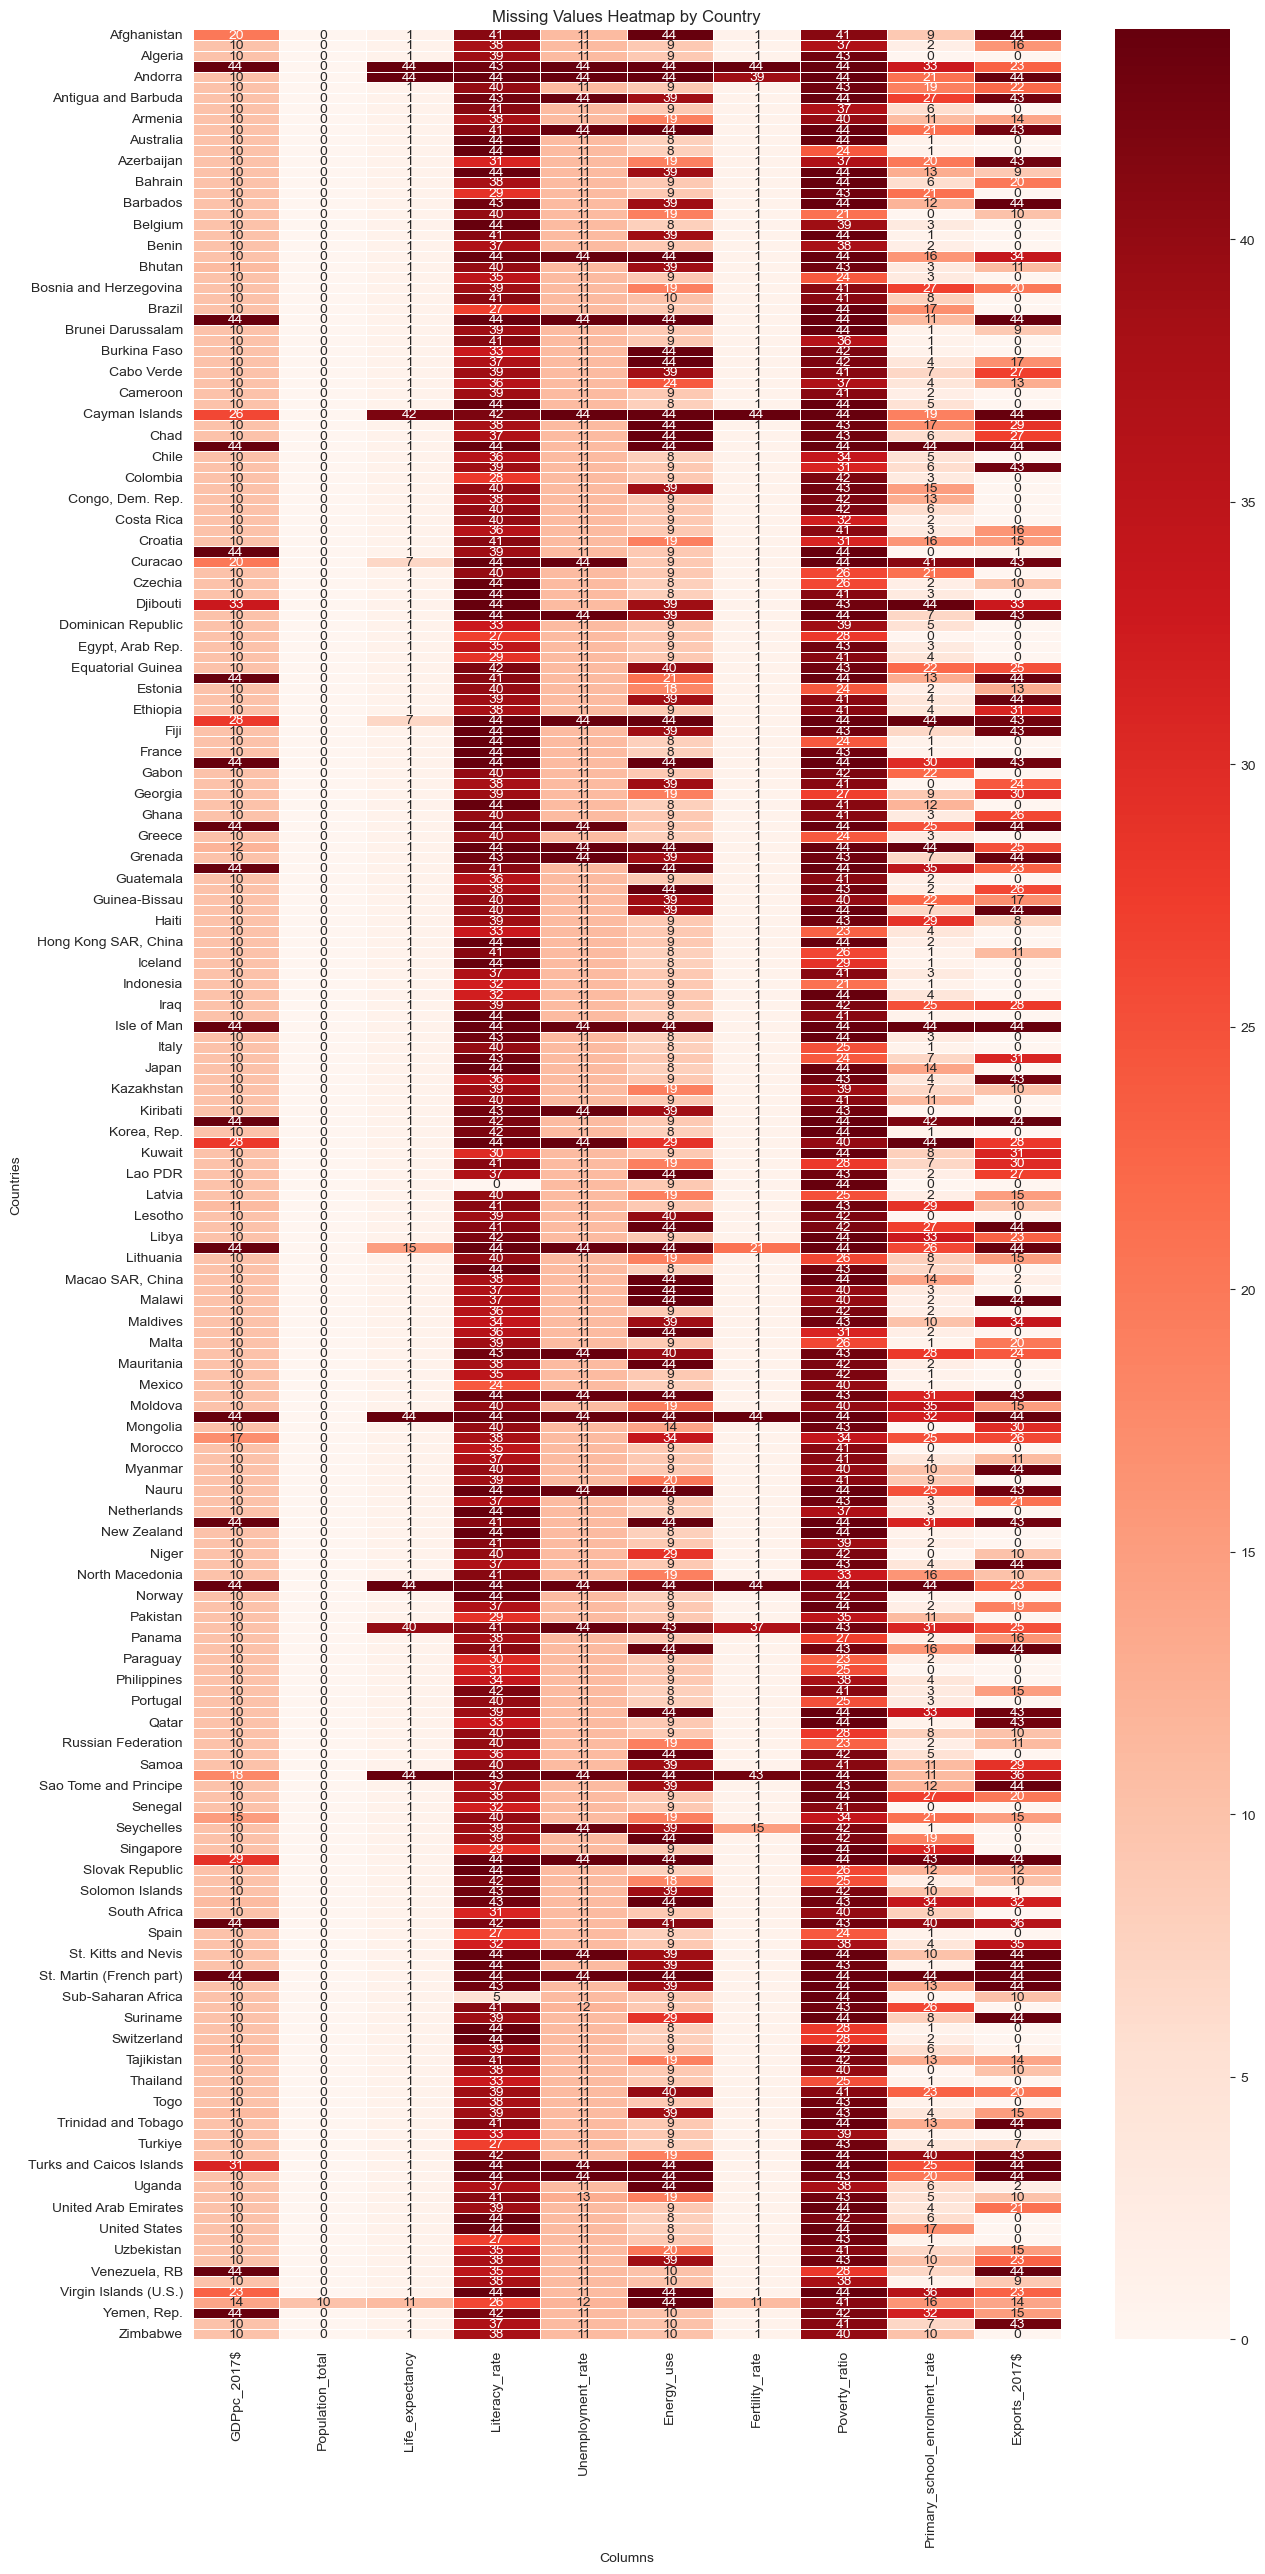

In [82]:
# Assuming the provided data is loaded as a DataFrame named df_missing_values
missing_by_country = df.drop(columns=['date']).groupby('country').apply(lambda x: x.isnull().sum())
missing_by_country = missing_by_country.drop(columns=['country'])

# Convert all columns except 'country' to numeric, ensuring proper visualization
df_missing_values = missing_by_country.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(14, 30))  # Adjust figure size for better visibility
sns.heatmap(df_missing_values, cmap="Reds", annot=True, fmt="d", linewidths=0.5)

# Adjust labels and title
plt.xlabel("Columns")
plt.ylabel("Countries")
plt.title("Missing Values Heatmap by Country")

# Show the plot
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

# Convert date column to datetime and sort
def normalize_and_plot(df, filter_countries=True, save_fig=False, file_dir=None):
    if save_fig:
        output_dir="results"
        os.makedirs(output_dir, exist_ok=True)
    
    df_plot=df.copy()
    df_plot = df_plot.sort_values(["country", "date"])  # Ensure chronological order

    # Select relevant countries
    if filter_countries==True:
        countries = ["United States", "China", "Russian Federation", "Brazil"]
        filtered_df = df_plot[df_plot["country"].isin(countries)].copy()
    else:
        countries = list(sorted(df_plot['country'].unique()))
        filtered_df = df_plot.copy()
        
    # Define indicators for different scaling methods
    minmax_indicators = [
        "Life_expectancy", "Unemployment_rate",
        "Fertility_rate", "Primary_school_enrolment_rate"
        ,"Literacy_rate","Poverty_ratio"
    ]

    log_transform_indicators = [
        "GDPpc_2017$", "Population_total", "Energy_use", "Exports_2017$"
    ]

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Create a new DataFrame for transformed data
    normalized_df = filtered_df.copy()

    ### **1️⃣ Apply MinMaxScaler for selected indicators**
    for indicator in minmax_indicators:
        for country in countries:
            mask = filtered_df["country"] == country
            values = filtered_df.loc[mask, indicator].dropna()  # Drop NaNs before scaling
            
            if len(values.unique()) == 1:
                normalized_df.loc[values.index, indicator]=1
            elif len(values.unique()) > 1:
                normalized_values = scaler.fit_transform(values.values.reshape(-1, 1)).ravel()
                normalized_df.loc[values.index, indicator] = normalized_values
            else:
                normalized_df.loc[values.index, indicator] = values  # Keep original if only one value

    ### **2️⃣ Apply Log Transformation for selected indicators**
    for indicator in log_transform_indicators:
        normalized_df[indicator] = np.log1p(normalized_df[indicator])  # log1p to avoid log(0) issues

    # Plot each indicator for all countries
    sns.set_style("whitegrid")

    for i,indicator in enumerate(minmax_indicators + log_transform_indicators):
        plt.figure(figsize=(12, 6))
        for country in countries:
            subset = normalized_df[normalized_df["country"] == country]
            # Plot only available (non-null) points with "-o"
            plt.plot(subset["date"], subset[indicator], "-o", label=country)

        plt.title(f"{indicator} Over Time")
        plt.xlabel("Year")
        plt.ylabel("Scaled Value" if indicator in minmax_indicators else "Log-Transformed Value")
        plt.legend()

        if save_fig:
            # Save plot as numbered PNG
            os.makedirs(f"{output_dir}/{file_dir}",exist_ok=True)
            filename = f"{output_dir}/{file_dir}/{i}_{indicator.replace('$', '').replace(' ', '_')}.png"
            plt.savefig(filename,dpi=300)
            plt.close()  # Close figure to free memory
        else:
            plt.show()

    return normalized_df


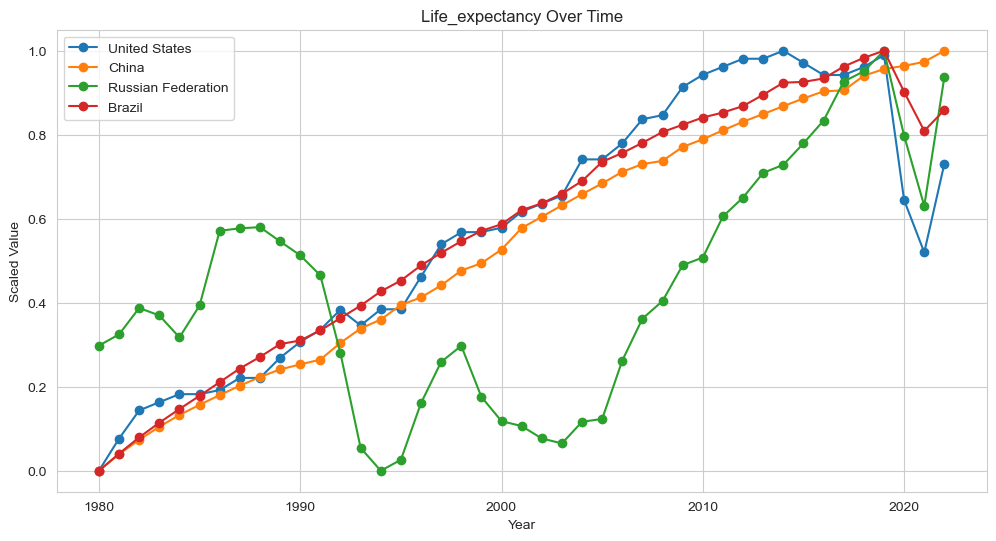

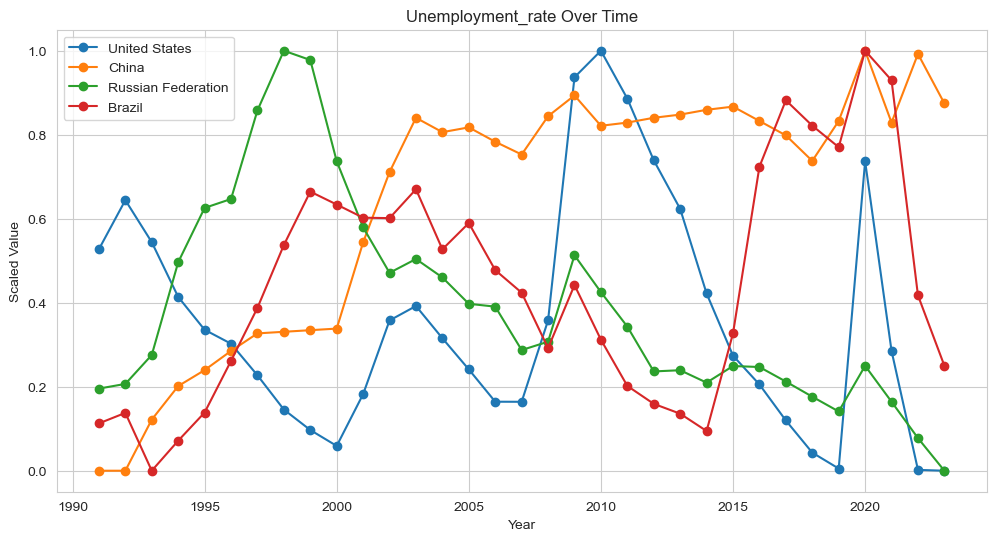

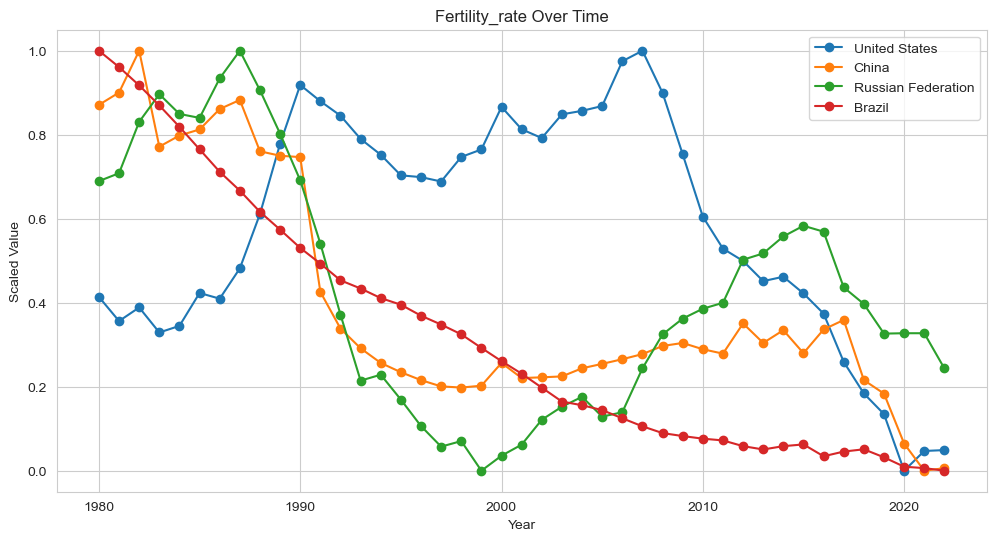

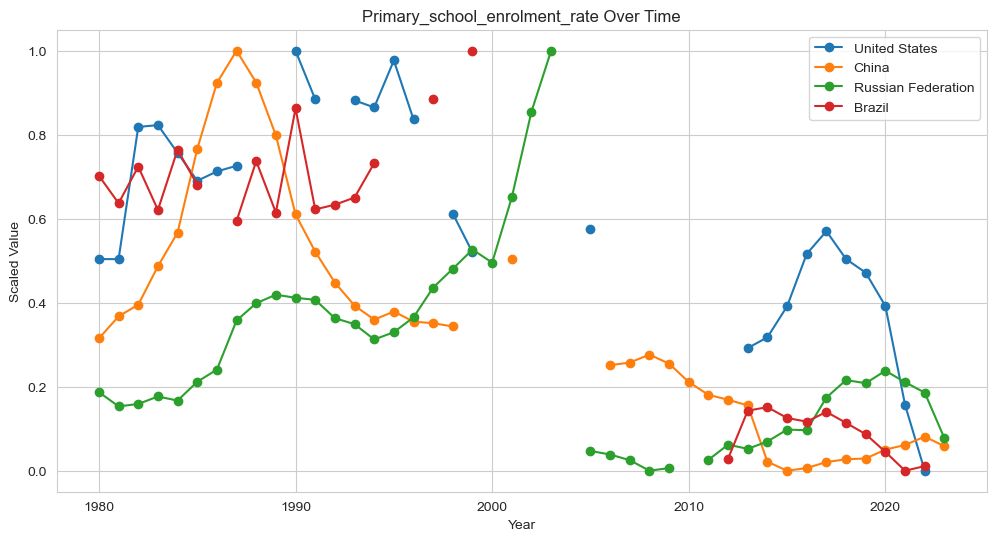

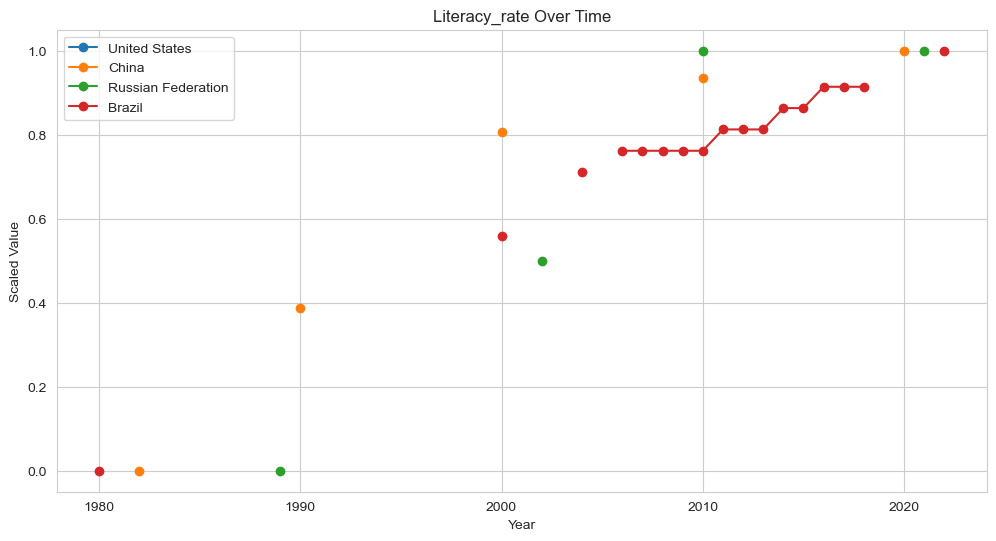

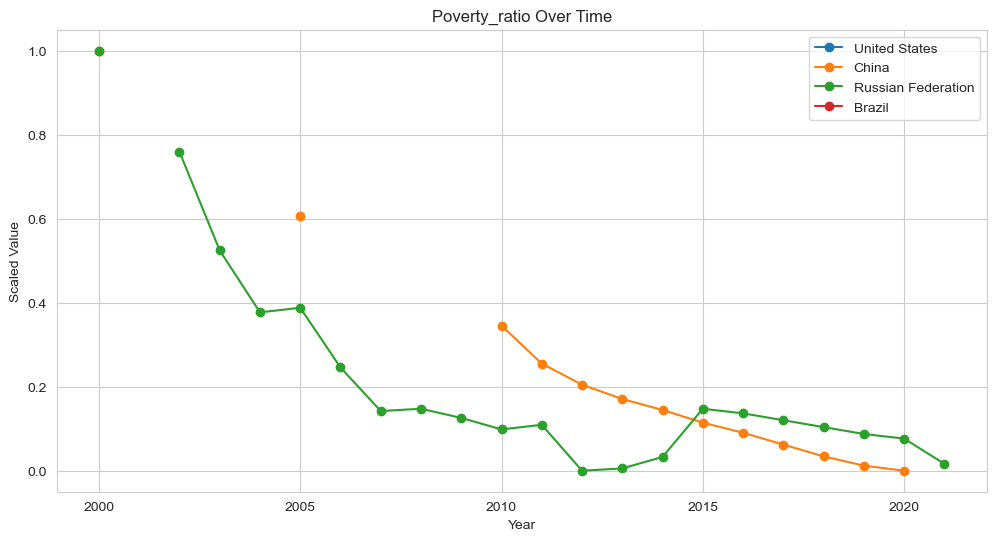

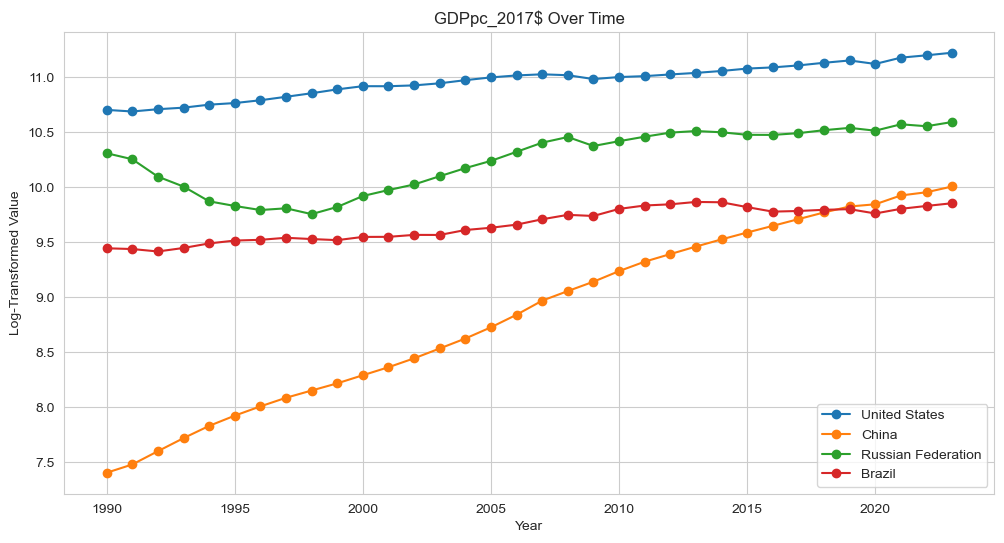

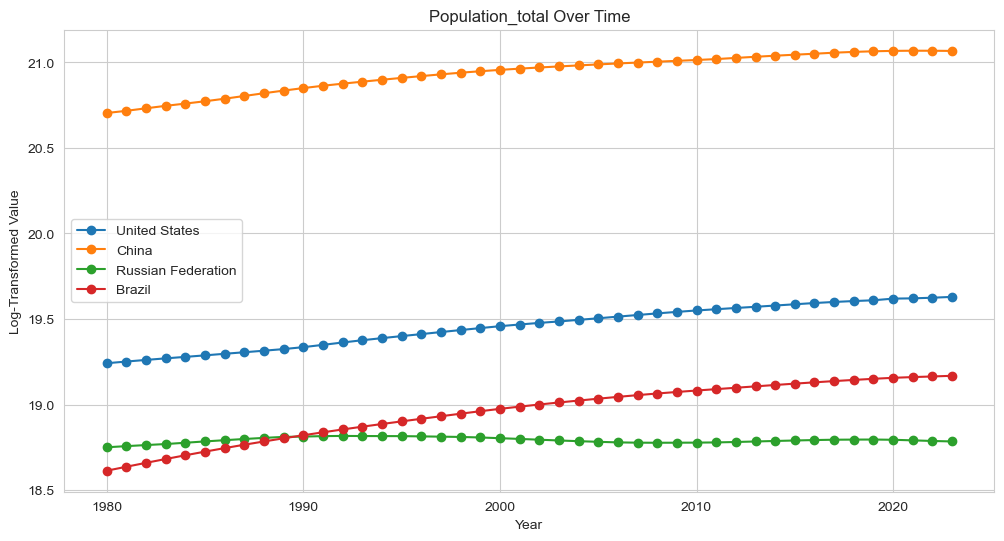

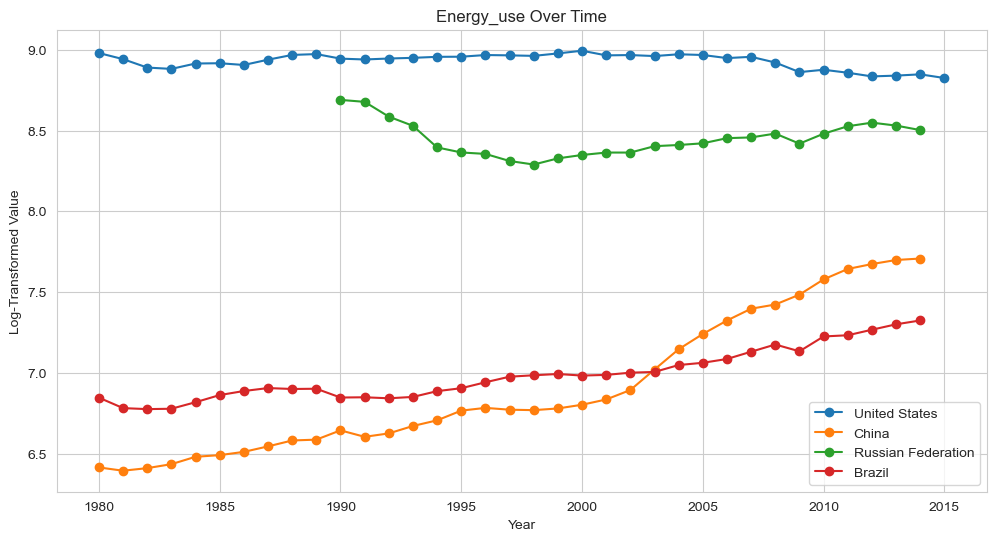

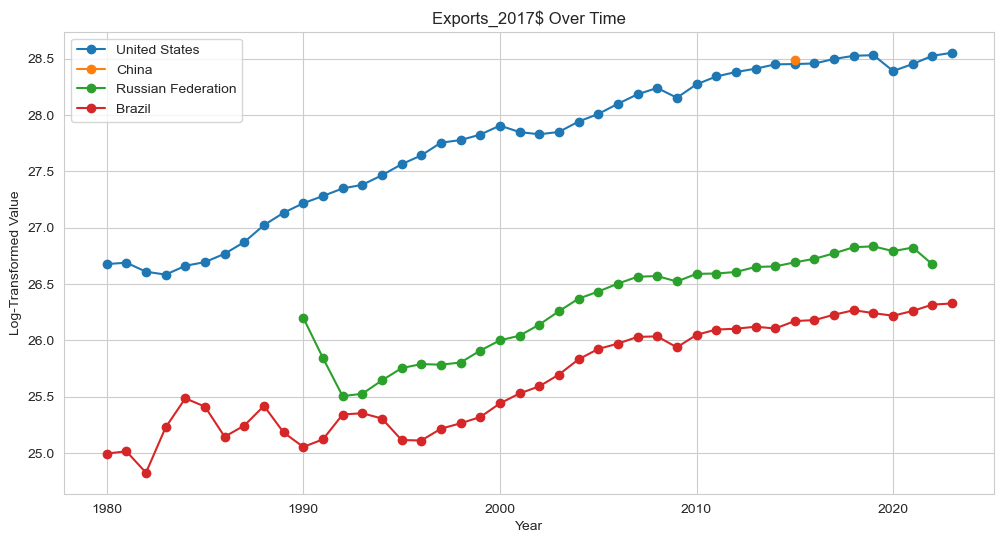

,country,date,GDPpc_2017$,Population_total,Life_expectancy,Literacy_rate,Unemployment_rate,Energy_use,Fertility_rate,Poverty_ratio,Primary_school_enrolment_rate,Exports_2017$
1187,Brazil,1980,NaN,18.613014,0.000000,0.0,NaN,6.846208,1.000000,NaN,0.702282,24.996749
1186,Brazil,1981,NaN,18.636301,0.040717,NaN,NaN,6.781478,0.961012,NaN,0.636936,25.017358
1185,Brazil,1982,NaN,18.659092,0.079295,NaN,NaN,6.775281,0.917462,NaN,0.724081,24.827329
1184,Brazil,1983,NaN,18.681429,0.114332,NaN,NaN,6.777578,0.869764,NaN,0.620871,25.229558
1183,Brazil,1984,NaN,18.703291,0.146935,NaN,NaN,6.818033,0.818747,NaN,0.764242,25.486789
...,...,...,...,...,...,...,...,...,...,...,...,...
9024,United States,2019,11.149266,19.609530,0.989744,NaN,0.005171,NaN,0.134796,NaN,0.471501,28.529588
9023,United States,2020,11.117708,19.619220,0.644289,NaN,0.736781,NaN,0.000000,NaN,0.392066,28.388855
9022,United States,2021,11.174922,19.620793,0.519814,NaN,0.285405,NaN,0.047022,NaN,0.156842,28.451611
9021,United States,2022,11.196061,19.624468,0.731002,NaN,0.002002,NaN,0.049112,NaN,0.000000,28.524051


In [84]:
normalize_and_plot(df)

In [85]:
non_nan_df=df.copy()
non_nan_df.dropna()

,country,date,GDPpc_2017$,Population_total,Life_expectancy,Literacy_rate,Unemployment_rate,Energy_use,Fertility_rate,Poverty_ratio,Primary_school_enrolment_rate,Exports_2017$
677,Benin,2006,2652.218420,8693242.0,57.456000,28.702110,0.889,339.232705,5.636,37.5,97.918823,1.468318e+09
936,Bosnia and Herzegovina,2011,12473.033050,3741798.0,77.007000,98.142036,27.582,1909.657336,1.216,17.9,88.970009,4.665406e+09
982,Belarus,2009,22236.838770,9504583.0,70.407317,100.000000,6.100,2790.777881,1.509,5.4,98.166840,2.299924e+10
1111,Bolivia,2012,8108.205187,10515807.0,66.705000,94.000000,2.066,738.045497,3.076,43.3,99.225906,9.382103e+09
1112,Bolivia,2011,7837.493186,10348929.0,66.534000,92.000000,2.255,652.306437,3.143,45.1,101.712624,8.281084e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
8461,Thailand,2010,16729.774760,68579447.0,76.131000,96.000000,0.622,1718.300455,1.576,16.4,97.592361,2.295620e+11
8471,Thailand,2000,11622.111670,63007815.0,72.316000,93.000000,2.389,1147.244052,1.612,42.3,96.551849,1.250300e+11
8725,Tunisia,2010,12389.196660,10765980.0,75.421000,79.000000,13.049,955.020444,2.105,20.5,105.668030,1.823636e+10
9513,South Africa,2014,14661.262430,55594838.0,63.380000,94.000000,24.890,2644.565004,2.424,55.5,109.028793,9.323317e+10


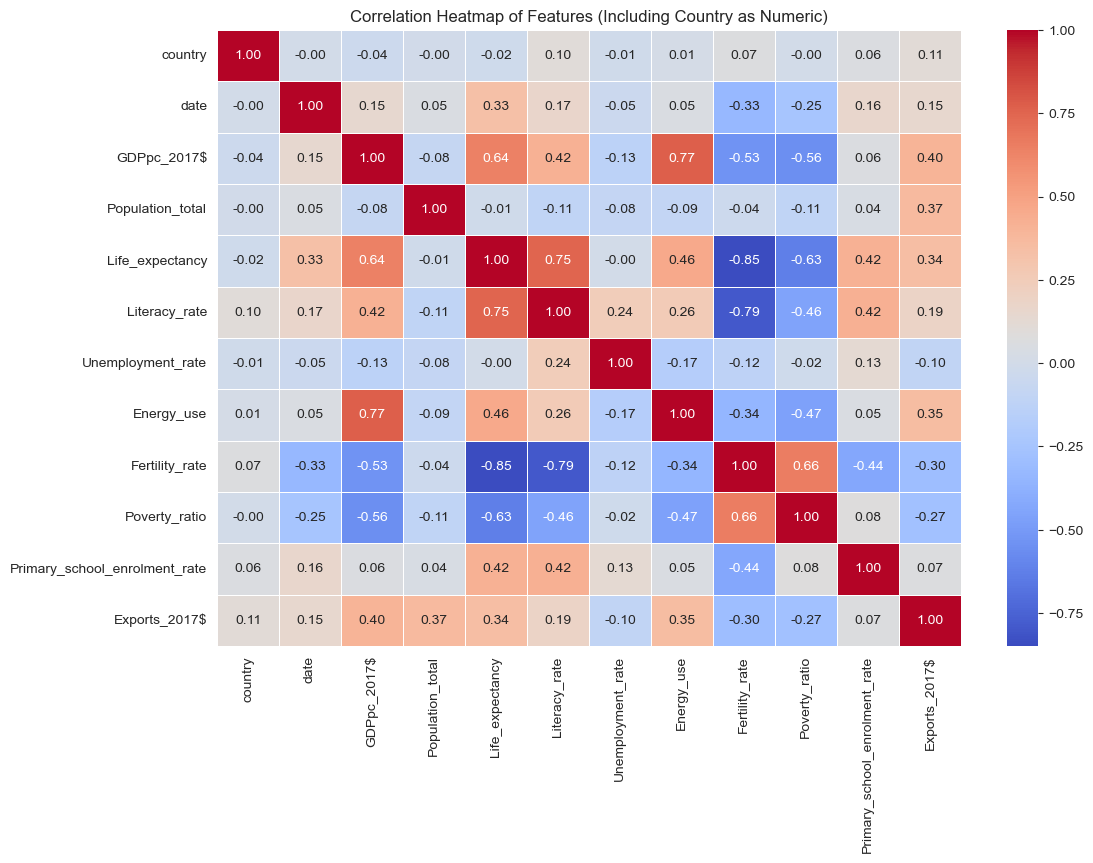

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
df_corr = non_nan_df.copy()

# Convert 'country' into numerical classes
label_encoder = LabelEncoder()
df_corr['country'] = label_encoder.fit_transform(df_corr['country'])

# Compute correlation matrix
non_nan_df_corr = df_corr.corr()

# Plot the correlation heatmap with numbers
plt.figure(figsize=(12, 8))
sns.heatmap(non_nan_df_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features (Including Country as Numeric)')
plt.show()

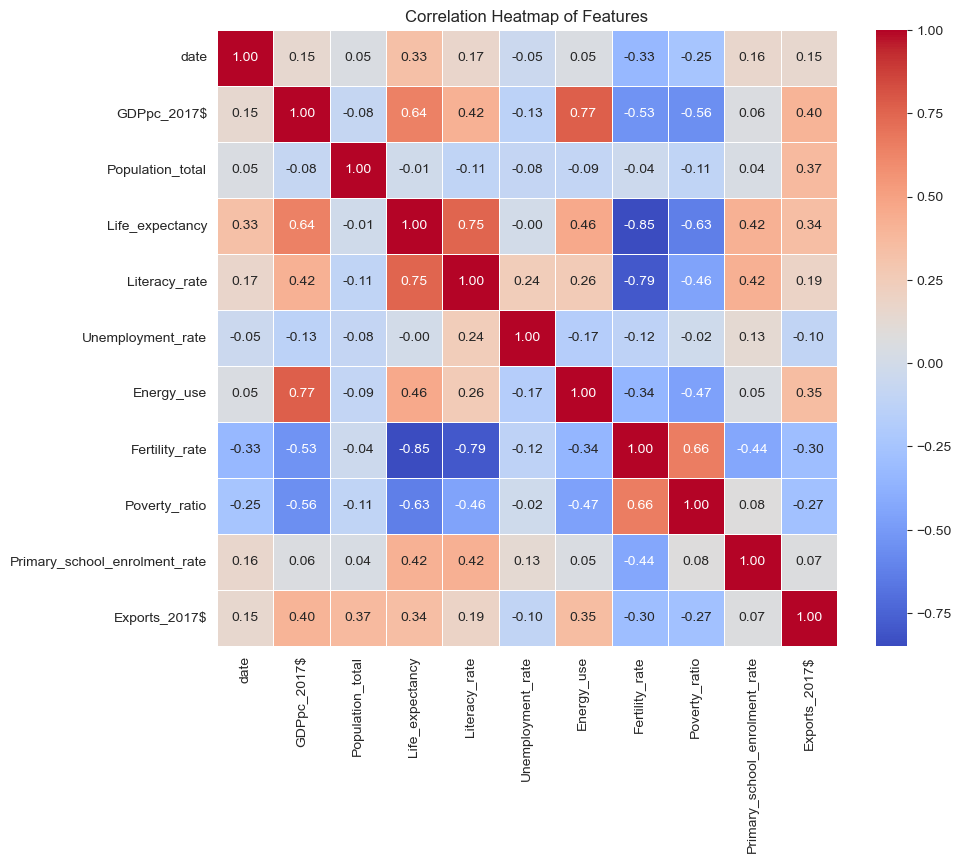

In [87]:
# Calculate and plot the correlation heatmap
non_nan_df_corr=non_nan_df.drop(columns=['country']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(non_nan_df_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [88]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [89]:
!pip install tqdm

In [90]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from tqdm import tqdm  # Progress bar

from sklearn.impute import KNNImputer
def impute_knn(df):
    """Impute missing values using KNN with data from all countries."""
    imputer = KNNImputer(n_neighbors=3)
    numeric_df = df.select_dtypes(include=[np.number])
    imputed_data = imputer.fit_transform(numeric_df)
    imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns, index=numeric_df.index)
    for col in df.columns:
        if col not in imputed_df.columns:
            imputed_df[col] = df[col]
    return imputed_df

def identify_missing_sequences(matrix):
    """ Identify missing sequences in each column of a matrix """
    is_nan = np.isnan(matrix)  # Boolean mask for missing values
    missing_indices = np.zeros_like(matrix, dtype=int)  # Store missing sequence indices
    # Compute missing groups (vectorized)
    for col in range(matrix.shape[1]):
        series=matrix[:, col]
        series = np.asarray(series)  # Convert to NumPy array
        is_nan = np.isnan(series)  # Identify missing values (NaN)
        
        # Fix: Ensure the first NaN is also counted
        missing_groups = np.cumsum(is_nan & np.concatenate(([True], ~is_nan[:-1])))  # Fix for first NaN
        missing_indices[:, col] = is_nan * missing_groups  # Assign sequence numbers

    return missing_indices

def auto_arima_impute(series, inverse=False):
    """ Auto ARIMA-based imputation for missing sequences """
    if not inverse:
        series = pd.Series(series).sort_values(ascending=True)
        valid_data = series.dropna()

        # Fit ARIMA on valid values
        model = auto_arima(valid_data, seasonal=False, suppress_warnings=True)

        # Predict missing values
        missing_idx = np.where(series.isna())[0]

        # print(series)
        # print(np.where(series.isna()))
        # print(missing_idx)
        predictions = model.predict(n_periods=len(missing_idx))
        predictions = np.flip(predictions)

    if inverse:
        series = pd.Series(series)
        valid_data = series.dropna()

        # Fit ARIMA on valid values
        valid_data = np.log1p(valid_data)
        model = auto_arima(valid_data, seasonal=False, suppress_warnings=True)

        # Predict missing values
        missing_idx = np.where(series.isna())[0]

        # print(series)
        # print(np.where(series.isna()))
        # print(missing_idx)
        predictions = model.predict(n_periods=len(missing_idx))
        predictions = np.expm1(model.predict(n_periods=len(missing_idx)))

    return np.array(predictions)

def impute_missing_values(matrix):
    """ Main function for matrix-based imputation """
    matrix = np.array(matrix, dtype=float)  # Convert to NumPy array
    missing_indices = identify_missing_sequences(matrix)
    
    for col in range(matrix.shape[1]):
        col_data = matrix[:, col]
        missing_seq = np.unique(missing_indices[:, col])
        for seq in missing_seq:
            is_nan=np.isnan(col_data)
            if seq == 0:
                continue  # Skip if not missing
            
            indices = np.where(missing_indices[:, col] == seq)[0]
            start, end, length = indices[0], indices[-1], len(indices)
            if length == 1:
                if start == 0:
                    col_data[start] = col_data[start+1]
                elif end == 43:
                    col_data[end] = col_data[end-1]
                else:
                    col_data[start] = (col_data[start+1]+col_data[start-1])/2
            elif length == 2 and (start-1) >=0 and (end+1) <44:
                col_data[start] = col_data[start-1]
                col_data[end] = col_data[end+1]
            elif length<15 and start == 0 and np.sum(is_nan[end+1:end+21])==0:
                arima_pred = auto_arima_impute(col_data[start:end+21].flatten())
                col_data[start:end+1] = arima_pred
            elif length<15 and end == 43 and np.sum(is_nan[start-15:start])==0:
                arima_pred = auto_arima_impute(col_data[start-15:end+1].flatten(), inverse=True)
                col_data[start:end+1] = arima_pred
            elif length != 44:
                try:
                    if (end+1) <=43:
                            col_data[start:end+1] = col_data[end + 1]
                    elif (start-1) >=0:
                        col_data[start:end+1] = col_data[start - 1]
                except Exception:
                    try:
                        col_data[start:end+1] = np.mean(col_data[~np.isnan(col_data)]) 
                    except Exception:
                        continue
            
        matrix[:, col] = col_data

    return matrix


processed_df_list = []
for country in tqdm(df['country'].unique(), desc="Processing Countries", unit="country"):
    # print(f"Processing {country}...")
    country_df = df[df['country'] == country].copy()
    country_labels = country_df[["country"]]
    numerical_columns = country_df.drop(columns=["country","date"])

    imputed_matrix = impute_missing_values(numerical_columns)
    imputed_df = pd.DataFrame(imputed_matrix, columns=numerical_columns.columns)
    imputed_df = pd.concat([country_labels.reset_index(drop=True), imputed_df], axis=1)

    processed_df_list.append(imputed_df)

output_imputed_df = pd.concat(processed_df_list, ignore_index=True)

# Retrieve original date values for each row using country as key
date_mapping = np.array(df['date'])

# Convert date to integer (if it's not already)
output_imputed_df['date'] = date_mapping

# Rearrange columns: Move 'date' to the second position
cols = output_imputed_df.columns.tolist()
cols.remove('date')  # Remove 'date' from its current position
cols.insert(1, 'date')  # Insert 'date' as the second column
output_imputed_df = output_imputed_df[cols]  # Reorder dataframe

final_imputed_df = impute_knn(output_imputed_df)
final_imputed_df = final_imputed_df.reindex(columns=['country'] + [col for col in final_imputed_df.columns if col != 'country'])

final_imputed_df.to_csv(r"data/final_impute_world_bank_data_dev.csv",index=False)


Processing Countries:   0%|          | 1/219 [00:00<02:18,  1.58country/s]c:\Users\tanbe\anaconda3\envs\wbd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
Processing Countries:   1%|          | 2/219 [00:05<11:21,  3.14s/country]c:\Users\tanbe\anaconda3\envs\wbd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
Processing Countries:   1%|▏         | 3/219 [00:09<13:26,  3.73s/country]c:\Users\tanbe\anaconda3\envs\wbd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
Processing Countries:   2%|▏         | 5

In [7]:
imputed_df=pd.read_csv(r"data\final_impute_world_bank_data_dev.csv")
print(imputed_df.isnull().sum())
normalised_imputed_df=normalize_and_plot(imputed_df, filter_countries=False, save_fig=True, file_dir="task1")
normalised_imputed_df.to_csv('data/normalised_imputed_world_bank_data_dev.csv', index=False)

country                          0
date                             0
GDPpc_2017$                      0
Population_total                 0
Life_expectancy                  0
Literacy_rate                    0
Unemployment_rate                0
Energy_use                       0
Fertility_rate                   0
Poverty_ratio                    0
Primary_school_enrolment_rate    0
Exports_2017$                    0
dtype: int64


In [7]:
normalised_df=pd.read_csv('data/normalised_imputed_world_bank_data_dev.csv')
normalised_df.head(5)

,country,date,GDPpc_2017$,Population_total,Life_expectancy,Literacy_rate,Unemployment_rate,Energy_use,Fertility_rate,Poverty_ratio,Primary_school_enrolment_rate,Exports_2017$
0,Afghanistan,1980.0,7.389457,16.393400,0.207997,0.0,0.014320,6.375811,0.959011,0.0,0.227318,22.263952
1,Afghanistan,1981.0,7.389457,16.295202,0.226055,0.0,0.013549,6.125879,0.952753,0.0,0.286471,22.258933
2,Afghanistan,1982.0,7.389457,16.212622,0.146746,0.0,0.021534,6.591348,0.948060,0.0,0.000000,22.388642
3,Afghanistan,1983.0,7.389457,16.205922,0.160669,0.0,0.033031,6.725733,0.943054,0.0,0.024755,21.568955
4,Afghanistan,1984.0,7.389457,16.230551,0.000000,0.0,0.038759,6.928794,0.935544,0.0,0.049509,22.748201


In [8]:
import pandas as pd
import numpy as np

def create_sequences(df, window_size=5, step_size=1):
    sequences = []
    countries = df['country'].unique()
    
    for country in countries:
        country_df = df[df['country'] == country].sort_values(by='date')
        indicators = country_df.columns.difference(['country', 'date'])
        
        for start in range(0, len(country_df) - window_size + 1, step_size):
            end = start + window_size
            sequence = country_df.iloc[start:end][indicators].values.flatten()
            
            if len(sequence) == window_size * len(indicators):  # Ensure proper sequence length
                formatted_sequence = ", ".join(map(str, sequence))  # Convert to comma-separated string
                sequences.append((country, formatted_sequence))
    
    return sequences

window_size=5

# Assuming 'final_imputed_df' is your DataFrame with the imputed data
sequences = create_sequences(normalised_df,window_size=window_size)

# Convert the sequences to a DataFrame for better visualization
sequences_df = pd.DataFrame(sequences, columns=['country', 'sequence'])

# Display the first few sequences
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full content of each column
print(sequences_df.head(5))

# Save to CSV
sequences_df.to_csv(f'data/sequences_world_bank_data_dev.csv', index=False)

       country  \
0  Afghanistan   
1  Afghanistan   
2  Afghanistan   
3  Afghanistan   
4  Afghanistan   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         sequence  
0                6.375811156297187, 22.26395190220201, 0.95901126408010

# Task 2

In [20]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from itertools import product
import csv
import time
import ast

df=pd.read_csv('data/sequences_world_bank_data_dev.csv')

# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def preprocess_data(df, countries):
    aggregated_data = []
    country_names = []
    
    for country in countries:
        country_df = df.loc[df["country"] == country].copy()  # Avoid SettingWithCopyWarning
        
        indicator = "sequence"
        
        # Convert string representations of lists to actual lists
        if isinstance(country_df[indicator].iloc[0], str):  
            country_df.loc[:, indicator] = country_df[indicator].apply(lambda x: ast.literal_eval(x))

        # Convert tuples to lists
        if isinstance(country_df[indicator].iloc[0], tuple):  
            country_df.loc[:, indicator] = country_df[indicator].apply(list)

        if not isinstance(country_df[indicator].iloc[0], (list, np.ndarray)):
            raise ValueError(f"Indicator {indicator} is not a sequence but {type(country_df[indicator].iloc[0])}")

        # Convert sequences into NumPy array
        stacked_values = np.vstack(country_df[indicator].values)

        # Compute statistics for each time step
        stats_dict = {
            f"{indicator}_mean": np.mean(stacked_values, axis=0),
            f"{indicator}_median": np.median(stacked_values, axis=0),
            f"{indicator}_max": np.max(stacked_values, axis=0),
            f"{indicator}_min": np.min(stacked_values, axis=0),
            f"{indicator}_var": np.var(stacked_values, axis=0),
            f"{indicator}_kurtosis": np.apply_along_axis(lambda x: pd.Series(x).kurt(), 0, stacked_values),  # ✅ FIXED
        }

        aggregated_data.append(np.hstack(list(stats_dict.values())))  # Flatten into a single row
        country_names.append(country)

    return np.array(aggregated_data), country_names

class EarlyStopping():
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return latent, reconstructed

# Training function
def train_autoencoder(data, batch_sizes, epochs_list, learning_rates):
    train_dataset = TensorDataset(torch.tensor(data, dtype=torch.float32).to(device))
    
    best_loss = 0
    best_params = None
    history = {}  # Store loss and accuracy per epoch

    input_dim = data.shape[1]
    latent_dim = 5

    for batch_size, num_epochs, lr in product(batch_sizes, epochs_list, learning_rates):
        print(f"Training with batch_size={batch_size}, epochs={num_epochs}, learning_rate={lr}")
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        model = Autoencoder(input_dim, latent_dim).to(device)
        early_stopping = EarlyStopping(patience=10, min_delta=0.001)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        train_losses = []

        for epoch in range(num_epochs):
            running_loss = 0
            for batch in train_loader:
                batch = batch[0].to(device)
                optimizer.zero_grad()
                latent, reconstructed = model(batch)
                loss = criterion(reconstructed, batch)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            
            train_loss = running_loss / len(train_loader)
            train_losses.append(train_loss)  # Store training loss
            print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}")

            early_stopping(running_loss)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        if train_losses[-1] > best_loss:
            best_loss = train_losses[-1]
            best_params = {'batch_size': batch_size, 'epochs': num_epochs, 'learning_rate': lr}
            best_model = model

            # Store training history for plotting
            history={
                'batch_size': batch_size, 'epochs': num_epochs, 'lr': lr, 
                'train_losses': train_losses
            }
        
    return best_model, best_params, history

# Clustering function
def cluster_countries(latent_data, result_dir, timestamp, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=11)
    clusters = kmeans.fit_predict(latent_data)

    # Save the trained KMeans model
    cluster_model_path = f"{result_dir}/model/clusters_{timestamp}.pkl"
    joblib.dump(kmeans, cluster_model_path)
    print(f"KMeans clustering model saved at {cluster_model_path}")

    # Compute clustering metrics
    silhouette = silhouette_score(latent_data, clusters)
    davies_bouldin = davies_bouldin_score(latent_data, clusters)

    # Compute clustering metrics
    silhouette = silhouette_score(latent_data, clusters)
    davies_bouldin = davies_bouldin_score(latent_data, clusters)
    calinski_harabasz = calinski_harabasz_score(latent_data, clusters)
    wcss = kmeans.inertia_  # Sum of squared distances of samples to their closest cluster center

    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"WCSS (Within-Cluster Sum of Squares): {wcss}")

    # Save results to CSV
    performance_results = {
        "model_path": [cluster_model_path],  # Wrap scalars in lists
        "Silhouette Score": [silhouette],
        "Davies-Bouldin Index": [davies_bouldin],
        "Calinski-Harabasz Index": [calinski_harabasz], 
        "WCSS": [wcss]
    }

    performance_df = pd.DataFrame(performance_results)
    performance_csv_path = f"{result_dir}/clustering_performance.csv"

    # Check if the CSV file exists before writing
    if os.path.exists(performance_csv_path):
        performance_df.to_csv(performance_csv_path, mode='a', header=False, index=False)  # Append without headers
    else:
        performance_df.to_csv(performance_csv_path, index=False)  # Write with headers

    print(f"Clustering performance results saved at {performance_csv_path}")

    # Save clustering assignments
    cluster_assignments_df = pd.DataFrame({
        "model_path": [cluster_model_path],
        "Country": [country_names],
        "Cluster": [clusters]
    })
    cluster_assignments_csv_path = f"{result_dir}/cluster_assignments.csv"

    # Check if file exists, then append without headers
    if os.path.exists(cluster_assignments_csv_path):
        cluster_assignments_df.to_csv(cluster_assignments_csv_path, mode='a', header=False, index=False)
    else:
        cluster_assignments_df.to_csv(cluster_assignments_csv_path, index=False)

    print(f"Cluster assignments saved at {cluster_assignments_csv_path}")


    return clusters


# Visualization using t-SNE
def visualize_clusters(latent_data, clusters, country_names, result_dir, timestamp):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(latent_data)
    
    df_viz = pd.DataFrame({
        "TSNE1": tsne_results[:, 0],
        "TSNE2": tsne_results[:, 1],
        "Cluster": clusters,
        "Country": country_names
    })
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", data=df_viz, palette="viridis", legend="full")
    for i, country in enumerate(df_viz["Country"]):
        plt.text(df_viz["TSNE1"].iloc[i], df_viz["TSNE2"].iloc[i], country, fontsize=8)
    plt.title("Clusters of Countries Based on Economic Indicators")
    plt.savefig(f"{result_dir}/tsne_{timestamp}.png")
    plt.close()

if __name__ == "__main__":
    # Set seed for reproducibility
    torch.manual_seed(11)
    np.random.seed(11)

    batch_sizes = [16, 32, 64]
    epochs_list = [150]
    learning_rates = [0.001, 0.01, 0.1]

    timestamp = int(time.time())
    result_dir = "results/task2"
    os.makedirs(result_dir, exist_ok=True)

    countries = list(sorted(df['country'].unique()))

    # Preprocess data
    data, country_names = preprocess_data(df, countries)
    print(data)
    print(country_names)

    # scaler = MinMaxScaler()
    # data = scaler.fit_transform(data)

    # Train Autoencoder
    # Reduced feature space
    trained_autoencoder, best_params, history = train_autoencoder(data, batch_sizes, epochs_list, learning_rates)

    
    output_dir=f"{result_dir}/training_graphs"
    os.makedirs(output_dir, exist_ok=True)

    epochs = range(1, len(history["train_losses"]) + 1)

    # Create a single plot for both accuracy & loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history["train_losses"], label="Train Loss", linestyle="-", marker="s", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy / Loss")
    plt.legend()
    plt.grid()
    plt.title(f"Training History (Batch {history['batch_size']}, LR {history['lr']})")
    plot_filename = f"{timestamp}_batch{history['batch_size']}_lr{history['lr']}.png"
    plot_path = os.path.join(output_dir, plot_filename)
    plt.savefig(plot_path)
    plt.close()
    print(f"Training history plot saved at: {plot_path}")

    model_dir=f"{result_dir}/model"
    os.makedirs(model_dir, exist_ok=True)
    model_path = f"{model_dir}/autoencoder_{timestamp}.pth"
    torch.save(trained_autoencoder.state_dict(), model_path)

    # Extract latent representations
    latent_data = trained_autoencoder.encoder(torch.tensor(data, dtype=torch.float32).to(device))
    latent_data = latent_data.cpu().detach().numpy()

    # Perform clustering
    clusters = cluster_countries(latent_data, result_dir, timestamp)

    # Visualize clusters
    visualize_clusters(latent_data, clusters, country_names, result_dir, timestamp)

Using device: cuda
[[ 6.8238119  23.41939098  0.74509543 ...  0.24120932 -1.83242422
   3.0009595 ]
 [ 6.56743942 20.57725506  0.43136729 ... -1.54230454 -0.90863998
   2.7479538 ]
 [ 6.873707   24.28317091  0.29619662 ...  0.         -1.41158528
  -1.4985483 ]
 ...
 [ 5.42518934 22.4774805   0.55934343 ... -0.59174964 -1.85398405
  -0.93056356]
 [ 6.50856045 22.78916467  0.58205701 ...  1.9467826  -0.71736262
  -1.1571419 ]
 [ 6.7453309  22.00710443  0.32935946 ...  0.93698359  0.25274054
   3.11583206]]
['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Is

c:\Users\tanbe\anaconda3\envs\wbd\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans clustering model saved at results/task2/model/clusters_1739899425.pkl
Silhouette Score: 0.5140848159790039
Davies-Bouldin Index: 0.567672467209189
Calinski-Harabasz Index: 569.302276010268
WCSS (Within-Cluster Sum of Squares): 101451.5
Clustering performance results saved at results/task2/clustering_performance.csv
Cluster assignments saved at results/task2/cluster_assignments.csv


# Task 3- MLP

In [ ]:

normalised_imputed_df=pd.read_csv('data/normalised_imputed_world_bank_data_dev.csv')

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split, Subset
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from itertools import product
import time
import csv

normalised_imputed_df=pd.read_csv('data/normalised_imputed_world_bank_data_dev.csv')

torch.manual_seed(11)
np.random.seed(11)

# Ensure GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Early Stopping Class
class EarlyStopping():
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Define model class
class GDPClassifier(nn.Module):
    def __init__(self, input_size):
        super(GDPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 4)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return self.softmax(x)

# Load and preprocess data
def load_and_preprocess_data(df):
    avg_gdp = df.groupby('country')['GDPpc_2017$'].mean().reset_index()
    avg_gdp['GDP_class'] = pd.qcut(avg_gdp['GDPpc_2017$'], q=4, labels=["Under-developed", "Developing", "Emerging", "Developed"])

    features = df.columns.difference(['country', 'date', 'GDPpc_2017$'])
    aggregated_data = df.groupby('country')[features].mean().reset_index()
    merged_data = aggregated_data.merge(avg_gdp[['country', 'GDP_class']], on='country')

    le = LabelEncoder()
    merged_data['label'] = le.fit_transform(merged_data['GDP_class'])

    X = merged_data.drop(['country', 'GDP_class', 'label'], axis=1).values
    y = merged_data['label'].values

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Convert to torch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32, device=device)
    y_tensor = torch.tensor(y, dtype=torch.long, device=device)

    return X_tensor, y_tensor, le

def train_model(input_shape, train_loader, val_loader, batch_size, num_epochs, lr):
    # Split dataset (train 70%, validation 15%, test 15%)
    print(f"Training with batch_size={batch_size}, epochs={num_epochs}, learning_rate={lr}")
    
    model = GDPClassifier(input_size=input_shape).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    early_stopping = EarlyStopping(patience=10, min_delta=0.001)
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train, total_train = 0, 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train

        train_losses.append(train_loss)  # Store training loss
        train_accuracies.append(train_accuracy)  # Store training accuracy

        # Validation evaluation
        correct_val, total_val = 0, 0
        val_loss = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = correct_val / total_val

        val_losses.append(val_loss)  # Store validation loss
        val_accuracies.append(val_accuracy)  # Store validation accuracy

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping")
            break
    
    params = {'batch_size': batch_size, 'epochs': num_epochs, 'learning_rate': lr}

    # Store training history for plotting
    history={
        'batch_size': batch_size, 'epochs': num_epochs, 'lr': lr, 
        'train_losses': train_losses, 'test_losses': val_losses,
        'train_accuracies': train_accuracies, 'test_accuracies': val_accuracies
    }

    return model, params, history  # Return history for plotting

def train_model_cv(X_tensor, y_tensor, batch_sizes, epochs_list, learning_rates, k_folds=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    best_accuracy = 0
    best_params = None
    history = {}  # Store loss and accuracy per epoch
    
    # Split dataset (train 70%, validation 15%, test 15%)
    # Split 85% Train, 15% Test
    train_X_tensor, test_X_tensor, train_y_tensor, test_y_tensor = train_test_split(
        X_tensor, y_tensor, test_size=0.15, random_state=11, shuffle=True
    )    
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=11)

    for batch_size, num_epochs, lr in product(batch_sizes, epochs_list, learning_rates):
        print(f"Training with batch_size={batch_size}, epochs={num_epochs}, learning_rate={lr}")

        fold_accuracies = []

        for fold, (train_idx, val_idx) in enumerate(kfold.split(train_X_tensor)):
            print(f"Fold {fold+1}/{k_folds}")

            # Create train and validation datasets
            train_dataset = Subset(TensorDataset(train_X_tensor, train_y_tensor), train_idx)
            val_dataset = Subset(TensorDataset(train_X_tensor, train_y_tensor), val_idx)

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

            # Initialize model
            model = GDPClassifier(input_size=X_tensor.shape[1]).to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Early stopping mechanism
            early_stopping = EarlyStopping(patience=10, min_delta=0.001)

            train_losses = []
            val_losses = []
            train_accuracies = []
            val_accuracies = []

            for epoch in range(num_epochs):
                model.train()
                running_loss, correct_train, total_train = 0.0, 0, 0

                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    total_train += labels.size(0)
                    correct_train += (predicted == labels).sum().item()

                train_loss = running_loss / len(train_loader)
                train_accuracy = correct_train / total_train
                train_losses.append(train_loss)
                train_accuracies.append(train_accuracy)

                # Validation step
                model.eval()
                val_loss, correct_val, total_val = 0, 0, 0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        val_loss += loss.item()

                        _, predicted = torch.max(outputs, 1)
                        total_val += labels.size(0)
                        correct_val += (predicted == labels).sum().item()

                val_loss /= len(val_loader)
                val_accuracy = correct_val / total_val
                val_losses.append(val_loss)
                val_accuracies.append(val_accuracy)

                print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

                early_stopping(val_loss)
                if early_stopping.early_stop:
                    print("Early stopping triggered")
                    break

            # Store fold history
            fold_accuracies.append(val_accuracies[-1])  # Store last validation accuracy for this fold

        # Compute average accuracy across folds
        avg_accuracy = sum(fold_accuracies) / k_folds

        # Update best model if the current one is better
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_params = {'batch_size': batch_size, 'epochs': num_epochs, 'learning_rate': lr}
    
    #train best model
    train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
    train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
    test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
    test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=True)

    model,params,history = train_model(input_shape=X_tensor.shape[1], train_loader=train_loader, val_loader=test_loader, batch_size=best_params['batch_size'], num_epochs=best_params['epochs'], lr=best_params['learning_rate'])
    results=evaluate(model, TensorDataset(test_X_tensor, test_y_tensor), batch_size, le)

    return model, params, history, results  # Return history for plotting

def save_training_history(history, file_path, output_dir):
    """Saves training history to a pickle file and plots accuracy & loss in a single graph."""

    output_dir=f"{output_dir}/training_graphs"
    # Ensure the directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over multiple history dictionaries
    epochs = range(1, len(history["train_losses"]) + 1)

    # Create a single plot for both accuracy & loss
    plt.figure(figsize=(10, 6))

    # Plot accuracy
    plt.plot(epochs, history["train_accuracies"], label="Train Accuracy", linestyle="-", marker="o", color="blue")
    plt.plot(epochs, history["train_losses"], label="Train Loss", linestyle="-", marker="s", color="red")
    
    try:
        plt.plot(epochs, history["test_accuracies"], label="Test Accuracy", linestyle="--", marker="o", color="dodgerblue")
        plt.plot(epochs, history["test_losses"], label="Test Loss", linestyle="--", marker="s", color="darkred")
    except Exception as e:
        pass

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy / Loss")
    plt.legend()
    plt.grid()
    plt.title(f"Training History (Batch {history['batch_size']}, LR {history['lr']})")

    # Save the plot
    plot_filename = f"{file_path}_batch{history['batch_size']}_lr{history['lr']}.png"
    plot_path = os.path.join(output_dir, plot_filename)
    plt.savefig(plot_path)
    plt.close()

    print(f"Training history plot saved at: {plot_path}")

def evaluate(model, test_dataset, batch_size, le):
    
    model.eval()
    y_true, y_pred = [], []
    all_outputs = []    
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure same device
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            all_outputs.extend(outputs.cpu().numpy())

    print(classification_report(y_true, y_pred, target_names=le.classes_))

    # Compute confusion matrix and metrics
    cm = confusion_matrix(y_true, y_pred)
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + tp + fn)

    # Compute per-class precision, recall, F1-score, and accuracy
    precision = np.diag(cm) / np.sum(cm, axis=0)  # TP / (TP + FP)
    recall = np.diag(cm) / np.sum(cm, axis=1)  # TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)  # Overall accuracy

    precision = np.nanmean(precision)  # Mean precision across classes
    recall = np.nanmean(recall)  # Mean recall across classes
    f1_score = np.nanmean(f1_score)  # Mean F1-score across classes

    return [tp.tolist(), fp.tolist(), tn.tolist(), fn.tolist(), accuracy, precision, recall, f1_score]

if __name__ == "__main__":
    # Set seed for reproducibility
    torch.manual_seed(11)
    np.random.seed(11)

    timestamp = int(time.time())
    result_dir = "results/task3"
    os.makedirs(result_dir, exist_ok=True)

    df_task3 = normalised_imputed_df.copy()
    X_tensor, y_tensor, le = load_and_preprocess_data(df_task3)

    batch_sizes = [32]
    epochs_list = [150]
    learning_rates = [0.01,0.1]

    model, params, history, results = train_model_cv(X_tensor, y_tensor, batch_sizes, epochs_list, learning_rates)
    save_training_history(history, file_path=str(timestamp), output_dir=result_dir)

    model_dir=f"{result_dir}/model"
    os.makedirs(model_dir, exist_ok=True)
    model_path = f"{model_dir}/{timestamp}.pth"
    torch.save(model.state_dict(), model_path)

    # Save results
    os.makedirs(result_dir, exist_ok=True)
    result_path = f"{result_dir}/results.csv"
    file_exists = os.path.isfile(result_path)
    header = ["model_path", "model", "tp", "fp", "tn", "fn", "accuracy", "precision", "recall", "f1-score"]

    results=[model_path] + results

    print(results)
    with open(result_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        # Write header if the file does not exist
        if not file_exists:
            writer.writerow(header)
        # Write the statistics
        writer.writerow(results)



Using device: cuda
Training with batch_size=32, epochs=150, learning_rate=0.01
Epoch 1/150 - Train Loss: 1.3637, Val Loss: 1.2895, Train Acc: 0.3987, Val Acc: 0.6875
Epoch 2/150 - Train Loss: 1.2838, Val Loss: 1.2164, Train Acc: 0.5686, Val Acc: 0.6250
Epoch 3/150 - Train Loss: 1.2138, Val Loss: 1.1655, Train Acc: 0.6013, Val Acc: 0.6250
Epoch 4/150 - Train Loss: 1.1786, Val Loss: 1.1141, Train Acc: 0.5817, Val Acc: 0.7188
Epoch 5/150 - Train Loss: 1.1432, Val Loss: 1.0679, Train Acc: 0.6275, Val Acc: 0.7812
Epoch 6/150 - Train Loss: 1.1114, Val Loss: 1.0348, Train Acc: 0.6536, Val Acc: 0.7812
Epoch 7/150 - Train Loss: 1.0774, Val Loss: 1.0212, Train Acc: 0.6993, Val Acc: 0.7500
Epoch 8/150 - Train Loss: 1.0512, Val Loss: 1.0157, Train Acc: 0.7386, Val Acc: 0.7500
Epoch 9/150 - Train Loss: 1.0450, Val Loss: 1.0162, Train Acc: 0.7516, Val Acc: 0.7188
Epoch 10/150 - Train Loss: 1.0104, Val Loss: 1.0138, Train Acc: 0.7778, Val Acc: 0.7500
Epoch 11/150 - Train Loss: 1.0284, Val Loss: 1.005

# Task 4